In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import copy
import math
from lab_utils_uni import plt_contour_wgrad

In [2]:
x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])
b_ini = 0.
w_ini = np.array([ 0., 0., 0., 0.])

In [3]:
def predict(x, w, b):
    y = np.dot(w, x) + b
    return y

In [4]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        y_predict = predict(x[i], w, b)
        cost_i = (y_predict - y[i]) ** 2
        cost += cost_i
    cost /= (2 * m)
    return cost

In [5]:
def compute_gradient(x, y, w, b):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        cost_i = (predict(x[i], w, b) - y[i])
        for j in range(n):
            dj_dw[j] += (cost_i * x[i,j])
        dj_db += cost_i
    return dj_dw / m, dj_db / m

In [6]:
print(compute_gradient(x_train,y_train,np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618]), 785.1811367994083))

(array([-2.72623577e-03, -6.27197263e-06, -2.21745578e-06, -6.92403391e-05]), np.float64(-1.6739251501955248e-06))


In [7]:
def gradient_descent(x, y, w_initial, b_initial, alpha, cost_function, gradient_function):
    w = copy.deepcopy(w_initial)
    b= copy.deepcopy(b_initial)
    j_history = []
    p_history = []
    stop_i = 0
    max_iteration = 1000000
    while stop_i < max_iteration:
        dj_dw, dj_db = gradient_function(x,y,w,b)

        w -= (alpha * dj_dw)
        b -= (alpha * dj_db)

        if stop_i > 0:
            tp_w,tp_b = p_history[-1]
            if abs(tp_b - b) <= 1.0e-8 and np.sum(np.abs(np.array(tp_w) - np.array(w))) <= 1.0e-8:
                p_history.append([w,b])
                j_history.append(cost_function(x, y, w, b))
                stop_i += 1
                break

        j_history.append(cost_function(x, y, w, b))
        p_history.append([w,b])

        if stop_i% math.ceil(max_iteration / 100) == 0:
            print(f"Iteration {stop_i+1:4}: Cost {j_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w}, b:{b: 0.5e}")
        
        stop_i += 1
    return w, b, j_history, p_history

In [8]:
w, b, j_history, p_history = gradient_descent(x=x_train, y=y_train,
                                              w_initial=w_ini, b_initial=b_ini,
                                              alpha=5.0e-7, cost_function=compute_cost,
                                              gradient_function=compute_gradient)
print(f"b,w found by gradient descent: {b:0.2f},{w}")


Iteration    1: Cost 2.53e+03  dj_dw: [-4.82669333e+05 -1.11733333e+03 -3.67333333e+02 -1.20700000e+04], dj_db: -2.900e+02   w: [2.41334667e-01 5.58666667e-04 1.83666667e-04 6.03500000e-03], b: 1.45000e-04
Iteration 10001: Cost 6.25e+02  dj_dw: [-2.35129373 -6.21358072 20.29781065 92.75262842], dj_db:  2.986e+00   w: [ 0.21700016  0.03241102 -0.10756894 -0.58002358], b:-1.90792e-02
Iteration 20001: Cost 5.94e+02  dj_dw: [-1.49969216 -5.96939276 18.56658587 59.16434956], dj_db:  1.804e+00   w: [ 0.22647014  0.06282451 -0.20441317 -0.95360462], b:-3.08374e-02
Iteration 30001: Cost 5.81e+02  dj_dw: [-0.95379535 -5.81050824 17.45023463 37.63345991], dj_db:  1.047e+00   w: [ 0.23250291  0.09224609 -0.29425217 -1.19161742], b:-3.78257e-02
Iteration 40001: Cost 5.75e+02  dj_dw: [-0.60386575 -5.70630894 16.72804615 23.8317692 ], dj_db:  5.615e-01   w: [ 0.23633235  0.12102008 -0.3795677  -1.34272807], b:-4.17568e-02
Iteration 50001: Cost 5.71e+02  dj_dw: [-0.37955784 -5.63716752 16.25853729 14

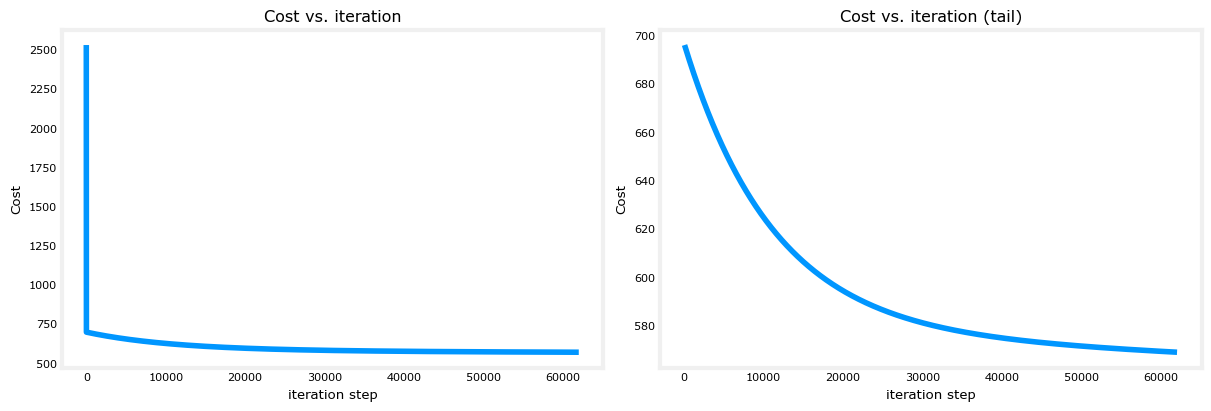

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(j_history)
ax2.plot(100 + np.arange(len(j_history[100:])), j_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()